<a href="https://colab.research.google.com/github/agenorrneto/pandemia_recife/blob/main/Vacina%C3%A7%C3%A3o_Recife_(3_dose).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

In [ ]:
df = pd.read_csv('http://dados.recife.pe.gov.br/dataset/7ccb3816-0d62-49e1-b39a-3159870883b0/resource/bceb5759-5500-49db-bc86-b038892acc06/download/vacinados.csv', delimiter=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df

,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
0,75 a 79 anos,77,MASCULINO,PARDA,RECIFE,IDOSOS,OUTROS,202009014,1 - CORONAVAC - SINOVAC (BUTANTAN),1.0,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2021-01-19 00:00:00.0
1,70 a 74 anos,72,MASCULINO,PARDA,RECIFE,IDOSOS,OUTROS,202009014,1 - CORONAVAC - SINOVAC (BUTANTAN),1.0,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2021-01-19 00:00:00.0
2,80 a 84 anos,81,MASCULINO,PARDA,RECIFE,IDOSOS,OUTROS,202009014,1 - CORONAVAC - SINOVAC (BUTANTAN),1.0,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2021-01-19 00:00:00.0
3,80 a 84 anos,80,MASCULINO,PARDA,RECIFE,IDOSOS,OUTROS,202009014,1 - CORONAVAC - SINOVAC (BUTANTAN),1.0,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2021-01-19 00:00:00.0
4,80 a 84 anos,84,FEMININO,PARDA,RECIFE,IDOSOS,OUTROS,202009014,1 - CORONAVAC - SINOVAC (BUTANTAN),1.0,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2021-01-19 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779161,10 a 14 anos,11,MASCULINO,AMARELA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,OUTROS,FH4751,3 - COMIRNATY (PFIZER),1.0,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2021-12-01 00:00:00.0
2779162,10 a 14 anos,13,MASCULINO,PARDA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,NaN,FH4751,3 - COMIRNATY (PFIZER),1.0,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2021-11-30 00:00:00.0
2779163,10 a 14 anos,13,MASCULINO,PARDA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,OUTROS,FH4751,3 - COMIRNATY (PFIZER),1.0,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2021-12-01 00:00:00.0
2779164,15 a 19 anos,17,FEMININO,PARDA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,NaN,FH4751,3 - COMIRNATY (PFIZER),2.0,DS 8: CNES: 0001198 - UBT ARISTARCHO DE AZEVEDO,Conecta Recife,2021-12-01 00:00:00.0


In [ ]:
df = df.loc[df['descricao_dose']==3]

In [ ]:
df = df.dropna(axis=1, how='any')

In [ ]:
df

,grupo,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
13560,IDOSOS,3 - COMIRNATY (PFIZER),3.0,DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...,NÃO,2021-11-22 00:00:00.0
13640,IDOSOS,3 - COMIRNATY (PFIZER),3.0,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,NÃO,2021-11-22 00:00:00.0
13721,IDOSOS,3 - COMIRNATY (PFIZER),3.0,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,NÃO,2021-11-22 00:00:00.0
13910,IDOSOS,3 - COMIRNATY (PFIZER),3.0,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,NÃO,2021-11-22 00:00:00.0
14642,IDOSOS,3 - COMIRNATY (PFIZER),3.0,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,NÃO,2021-11-22 00:00:00.0
...,...,...,...,...,...,...
2779107,IDOSOS,3 - COMIRNATY (PFIZER),3.0,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2021-11-30 00:00:00.0
2779109,TRABALHADORES DA SAÚDE,3 - COMIRNATY (PFIZER),3.0,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2021-12-01 00:00:00.0
2779113,TRABALHADORES DA SAÚDE,3 - COMIRNATY (PFIZER),3.0,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2021-12-01 00:00:00.0
2779114,IDOSOS,3 - COMIRNATY (PFIZER),3.0,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2021-12-01 00:00:00.0


In [ ]:
df = df.drop(['grupo','vacina_fabricante','descricao_dose','cnes','sistema_origem'], axis = 1)

In [ ]:
df['col']=1

In [ ]:
df.data_vacinacao = pd.to_datetime(df.data_vacinacao)

In [ ]:
df = df.sort_values('data_vacinacao')

In [ ]:
df = df.groupby('data_vacinacao')

In [ ]:
df['col'].sum()

data_vacinacao
2021-09-09      91
2021-09-10     200
2021-09-11      30
2021-09-12      85
2021-09-13     226
              ... 
2021-11-27    4187
2021-11-28    3658
2021-11-29    5369
2021-11-30    5969
2021-12-01    5523
Name: col, Length: 84, dtype: int64

In [ ]:
newdf = pd.DataFrame(df['col'].sum())

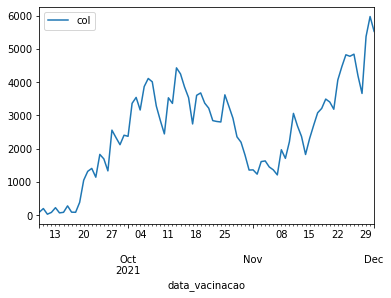

In [ ]:
newdf.plot()

In [ ]:
newdf['Frequência acumulativa absoluta'] = newdf['col'].cumsum()

In [ ]:
newdf.drop('col', axis = 1, inplace=True)

In [ ]:
newdf

,Frequência acumulativa absoluta
data_vacinacao,
2021-09-09,91
2021-09-10,291
2021-09-11,321
2021-09-12,406
2021-09-13,632
...,...
2021-11-27,193486
2021-11-28,197144
2021-11-29,202513


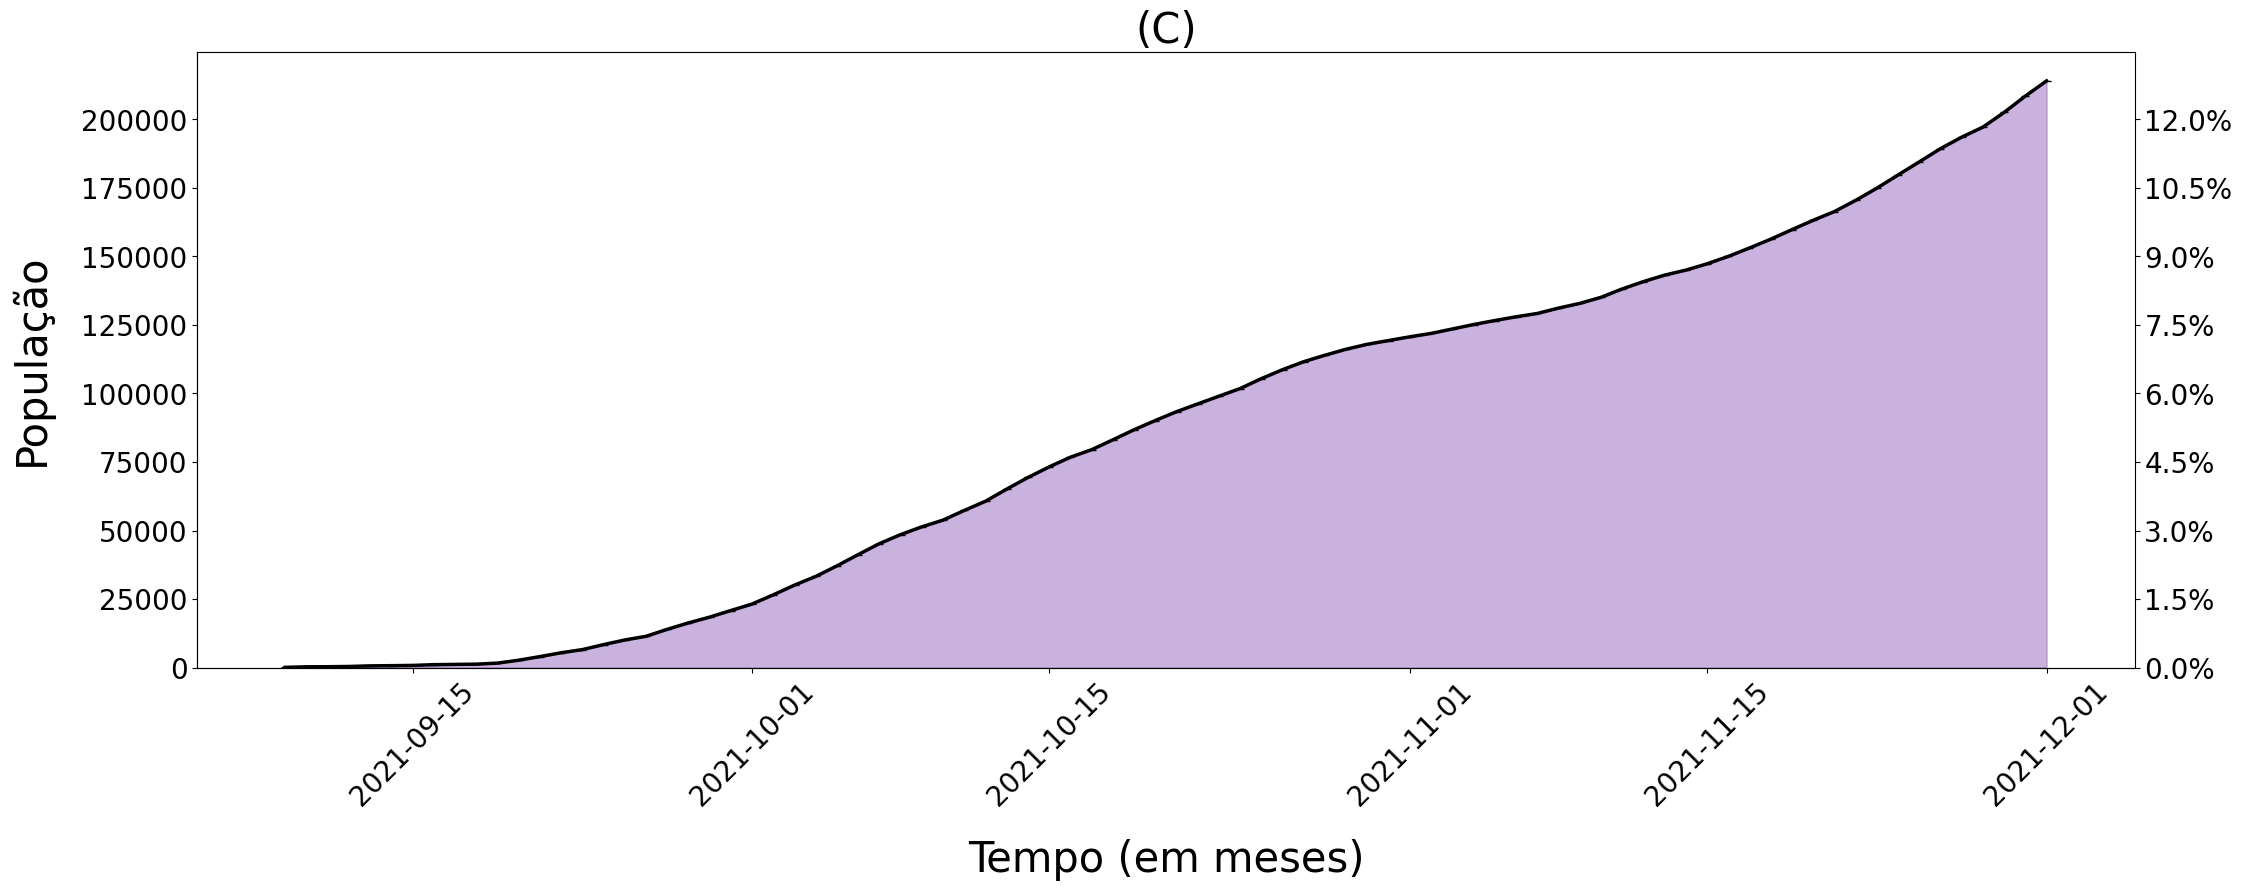

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.style.use('default')
        
fig1, ax1 = plt.subplots(figsize=(25,8))

ax1.stackplot(newdf.index, newdf["Frequência acumulativa absoluta"], color="C4",alpha=0.5)
ax1.set_ylabel("População", color="black", size=(30), fontfamily='default', labelpad=20)
ax1.tick_params(axis="y", colors="black")
ax1.set_xlabel("Tempo (em meses)", size=(30), fontfamily='default', labelpad=20)
ax1.set_xticklabels(newdf["Frequência acumulativa absoluta"], rotation=45, size=20)
ax1.set_yticklabels(newdf["Frequência acumulativa absoluta"], size=20)
ax2 = ax1.twinx()

ax2.set_xlabel('Tempo (meses/ano)', size=(30), fontfamily='default', labelpad=20)
ax2.set_ylabel('', size=(20), fontfamily='default', labelpad=20)
ax2.set_title('(C)', size=(30), fontfamily='default')
ax2.set_yticklabels(newdf["Frequência acumulativa absoluta"], size=20)
right_side = ax2.spines["right"]
right_side.set_visible(False)
right_side = ax2.spines["top"]
right_side.set_visible(False)

ax2.plot(newdf, color = 'black',linewidth=2.5,linestyle='solid', marker='_')
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1661017))
ax2.set_ylim(ymin=0)
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), '')))

plt.show()
plt.savefig('cumsumabsolutaMIC.png')